# Customer Churn Prediction – Telecom Dataset

Created by: Maureen Ekwebelem
CISC 5790
05/15/2025

## Overview
## 📘 Introduction
Customer churn, the rate at which customers leave a service, is a critical metric for telecom companies. Reducing churn directly impacts company revenue and customer retention. This project analyzes a dataset from an Iranian telecom company containing 3,150 customers from a telecom company's database. While churn status reflects each customer’s outcome after 12 months, the feature data was aggregated over the first 9 months- this was the available input data used for modeling.

The goal is to:
- Predict at-risk customers before they leave.
- Identify key drivers of churn (e.g., high complaints, low usage).
- Recommend retention strategies (e.g., targeted promotions such as personalized discounts, service improvements, etc.)

**Source:** UCI ML Repository: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset 

## 🛠️ Data Preprocessing
The dataset was clean with no missing values. Categorical variables were encoded for modeling, and numerical features were standardized to prepare for modeling. These steps helped set up the data for effective analysis and modeling.

## 🔍 Exploratory Data Analysis (EDA)
This EDA revealed several patterns related to churn:  
(1) Complaints & call failures were strongly linked to churn, with dissatisfied customers more likely to leave.  
(2) Lower usage patterns, such as shorter total usage time and lower frequency of use, were also correlated to higher churn.  
(3) Customer value & account status were important factors. Customers with higher value & better account status were less likely to churn.  

## 📈 Modeling
Several classifcation models were tested, including **Logistic Regression, Random Forest, XGBoost, and Naive Bayes.** To address class imbalance, SMOTE was applied. **Random Forest and XGBoost** were the highest performing models and their feature importance scores confirmed that complaints, call failures, customer value, and account status were key predictors.

## 💡 Insights & Recommendations
The analysis highlights key opportunities to reduce churn:  
⭐ Reminders of usage insights & tips: Highlighting underused features in the customer’s plan to increase perceived value & engagement.  
⭐ Strengthen retention among low-engagers: Provide perks that add value and encourage continued use without incentivizing inactivity.   
⭐ Personalize retention efforts: Flag at-risk accounts and follow up with reassuring, empathetic outreach to make customers feel heard and supported.  

By combining these incentives and personalized engagement, the company can take focused steps to retain customers and strengthen loyalty.

In [2]:
# Data Preprocessing

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Scaling the data
from sklearn.preprocessing import StandardScaler

#Handling imbalanced data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Classifiers- LR, Random Forest, XGBoost, Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#Confusion Matrix to assess accuracy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load the Data and Assign X and Y
customer_churn = pd.read_csv("/Users/maureenekwebelem/Downloads/Customer Churn.csv")

X = customer_churn.drop(columns=['Churn'])
y = customer_churn['Churn']

In [4]:
# Taking a quick look at the first 5 rows of data
customer_churn.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
print(customer_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

**Note:** No missing values were found, so imputation wasn’t necessary
If needed, simple methods like mean or median for numerical data and the most frequent value for categorical data would be appropriate. Alternatively, for more complex cases, predictive methods such as linear regression could also be considered to estimate missing values based on related features.

In [6]:
# Removing an extra space from column names
customer_churn.rename(columns={'Call  Failure' : 'Call Failure',
    'Subscription  Length': 'Subscription Length',
    'Charge  Amount': 'Charge Amount'
}, inplace=True)

In [7]:
# Verifying the column names were changed
print(customer_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [8]:
# Viewing the distribution of the data
print(customer_churn.describe())

       Call Failure    Complains  Subscription Length  Charge Amount  \
count   3150.000000  3150.000000          3150.000000    3150.000000   
mean       7.627937     0.076508            32.541905       0.942857   
std        7.263886     0.265851             8.573482       1.521072   
min        0.000000     0.000000             3.000000       0.000000   
25%        1.000000     0.000000            30.000000       0.000000   
50%        6.000000     0.000000            35.000000       0.000000   
75%       12.000000     0.000000            38.000000       1.000000   
max       36.000000     1.000000            47.000000      10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000       

In [9]:
# Combine features and target for processing
df = pd.concat([X, y], axis=1)

In [10]:
# Data Type Conversion (converting binary columns to int)
binary_cols = ['Complains', 'Status', 'Churn']
customer_churn[binary_cols] = customer_churn[binary_cols].astype(int)

In [11]:
# Verify Data Conversion
customer_churn.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [12]:
# Average Monthly Usage:
customer_churn['Avg_Seconds_Per_Month'] = customer_churn['Seconds of Use'] / 9
customer_churn['Avg_SMS_Per_Month'] = customer_churn['Frequency of SMS'] / 9
customer_churn['Avg_Usage_Frequency_Per_Month'] = customer_churn['Frequency of use'] / 9

In [13]:
# Scale continuous features
scale_cols = ['Charge Amount', 'Seconds of Use', 'Frequency of SMS', 'Frequency of use',
              'Customer Value', 'Subscription Length', 'Avg_Seconds_Per_Month',
              'Avg_SMS_Per_Month', 'Avg_Usage_Frequency_Per_Month']
scaler = StandardScaler()
customer_churn[scale_cols] = scaler.fit_transform(customer_churn[scale_cols])

In [14]:
# Saving data
customer_churn.to_csv('cleaned_customer_churn.csv', index=False)

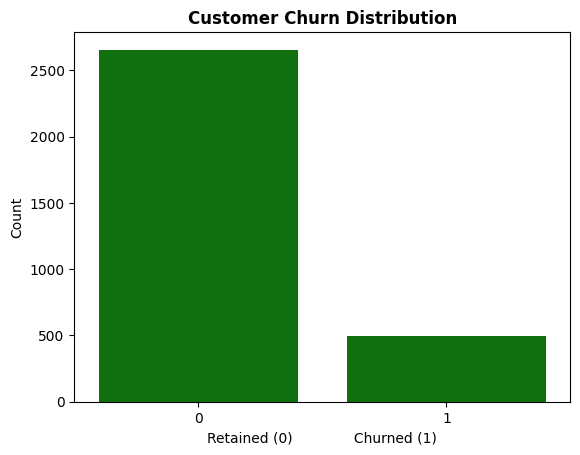

Churn Rate:
 Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64


In [15]:
# Exploratory Data Analysis 

# What is the average churn rate?
sns.countplot(data=customer_churn, x='Churn', color = 'green')
plt.title('Customer Churn Distribution', fontweight = 'bold')
plt.xlabel('Retained (0)              Churned (1)')
plt.ylabel('Count')
plt.show()
print("Churn Rate:\n", customer_churn['Churn'].value_counts(normalize=True))

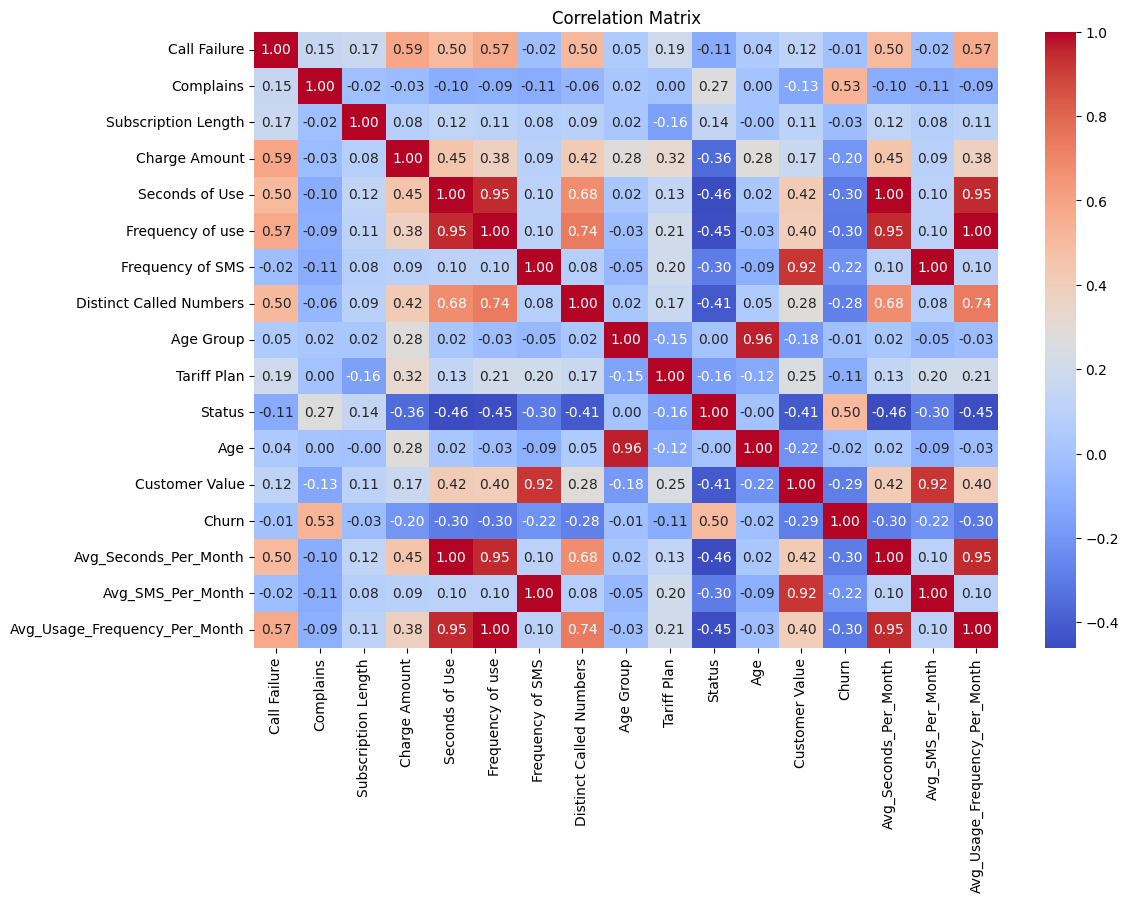

In [16]:
# Compute correlation
corr = customer_churn.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Correlation Heatmap Insights

The heatmap offers another perspective on the relationships between features in the dataset and reinforces several key patterns.
**Confirming Key Patterns:**
- **Complains (+0.53) and Call Failure (+0.53)** continue to show strong positive correlations with churn, further emphasizing that dissatisfied customers are more likely to leave.
- **Complaints Per Call (+0.30)** also supports this, indicating that frequent complainers face a higher risk of churn.

**Confirming Low Engagement as a Churn Driver:**
- **Status (-0.41), Seconds of Use (-0.30), Frequency of Use (-0.30), and Customer Value (-0.29)** all show negative correlations with churn. This agrees with earlier findings that customers with lower usage and lower value are more likely to leave.

**Summary:**
Overall, the heatmap confirms both dissatisfaction and low engagement continue to emerge as strong indicators of churn. These variables are important to consider for predictive modeling and developing targeted retention strategies.

In [17]:
# Feature Churn vs Retained
print(customer_churn.groupby('Churn')[['Complains', 'Customer Value', 'Seconds of Use', 'Frequency of use', 'Subscription Length']].mean())

       Complains  Customer Value  Seconds of Use  Frequency of use  \
Churn                                                                
0       0.015443        0.124849        0.129076          0.130977   
1       0.404040       -0.669644       -0.692318         -0.702515   

       Subscription Length  
Churn                       
0                 0.014071  
1                -0.075472  


This data highlights some key patterns in customer behavior:

- Churned customers reported **far more complaints (0.404 vs. 0.015)**, confirming dissatisfaction plays a major role in churn.
- They also showed **lower customer value (-0.670 vs. 0.125)**, along with **lower usage (-0.692 vs. 0.129)** and **shorter subscription length (-0.075 vs. 0.014)**, pointing to disengagement.
- In contrast, retained customers tended to have **higher usage and longer subscriptions**, reinforcing the idea that stronger engagement helps reduce churn risk.

Overall, churned customers were both **less engaged and more dissatisfied**, which highlights the need to improve service experiences and encourage continued service usage.

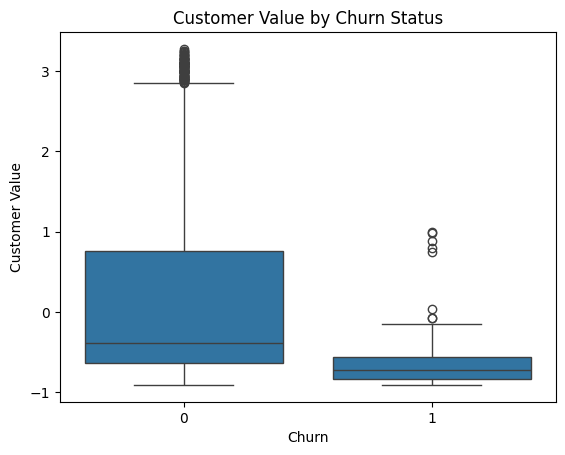

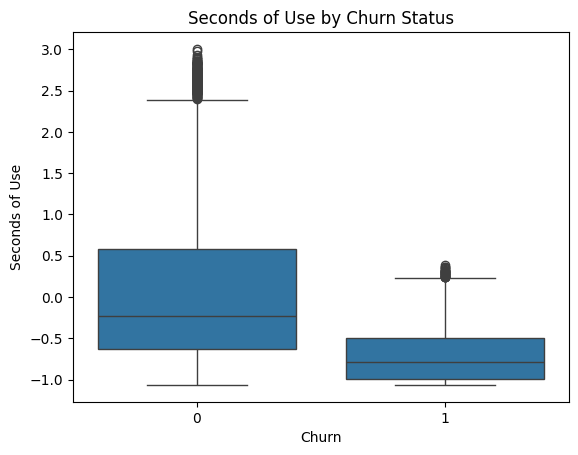

In [18]:
# Example: Customer Value by Churn
sns.boxplot(data=customer_churn, x='Churn', y='Customer Value')
plt.title('Customer Value by Churn Status')
plt.show()

# Example: Seconds of Use
sns.boxplot(data=customer_churn, x='Churn', y='Seconds of Use')
plt.title('Seconds of Use by Churn Status')
plt.show()

**Note:** The values in the boxplots are standardized using StandardScaler, meaning a value of 0 represents the average. Negative values indicate below-average usage or customer value, while positive values indicate above-average behavior.

### Insights from Boxplots

These visualizations further support our earlier findings. 
- **Customer Value** and **Seconds of Use** are noticeably lower for churned customers, reinforcing the idea that lower engagement and value are closely tied to churn.
- Retained customers show higher and more varied usage, which aligns with the pattern that stronger engagement reduces churn risk.

**Overall, the boxplots add visual confirmation that less engaged customers are more likely to leave.**

In [19]:
# Selecting the Highest correlated features for modeling
selected_features = [
    'Complains',
    'Call Failure',
    'Status',
    'Seconds of Use',
    'Frequency of use',
    'Customer Value',
    'Subscription Length',
    'Charge Amount',
    'Tariff Plan',
    'Age Group'
]

X_model = customer_churn[selected_features]
y_model = customer_churn['Churn']

## Modeling using 4 Classification Models 
(1) Logistic Regression, (2) Random Forest, (3) XGBoost, (4) Naive Bayes

In [20]:
# Modeling (using Classification models)

# Split the dataset with stratify- train/test split might randomly assign too few churners to the training set
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42, stratify=y_model)

# Apply SMOTE to the training data only to address class imbalance 
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the new class balance
print("Original y_train class distribution:\n", y_train.value_counts())
print("After SMOTE y_train class distribution:\n", y_train_sm.value_counts())

Original y_train class distribution:
 Churn
0    1858
1     347
Name: count, dtype: int64
After SMOTE y_train class distribution:
 Churn
1    1858
0    1858
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.98      0.81      0.89       797
           1       0.47      0.89      0.62       148

    accuracy                           0.83       945
   macro avg       0.72      0.85      0.75       945
weighted avg       0.90      0.83      0.85       945



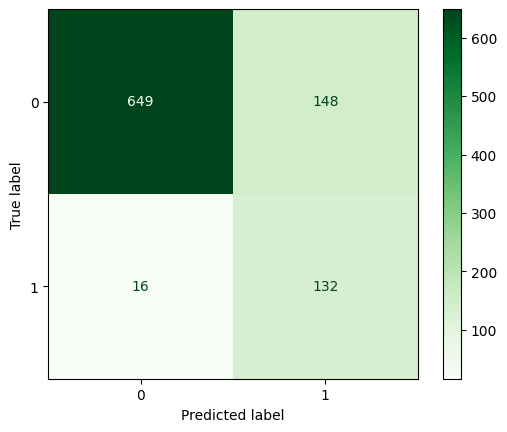

In [21]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sm, y_train_sm)

# Predict on the test set (REAL data, not SMOTE'd)
y_pred = logreg.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Greens')

### Logistic Regression Insights:
- Good Accuracy: 83%; strong recall for churn (0.81) but low precision (0.47), leading to many false positives.
- F1-score for churn: moderate (0.62), reflecting this imbalance.
- Confusion Matrix: It catches most churners, but at the cost of many false positives → correctly predicts churn, but also wrongly flags many who stayed.

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       797
           1       0.83      0.91      0.87       148

    accuracy                           0.96       945
   macro avg       0.91      0.94      0.92       945
weighted avg       0.96      0.96      0.96       945



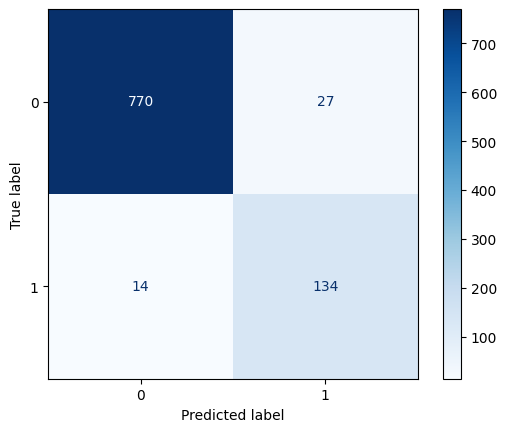

In [22]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Predict on real test data
rf_preds = rf_model.predict(X_test)

# Evaluate
print(classification_report(y_test, rf_preds))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_).plot(cmap='Blues')


### Random Forest Insights:

- High Accuracy: 96% ; Very good precision (0.85) and recall (0.91). Very balanced predictions.
- F1-score for churn is strong (0.88), showing reliable churn detection.
- Confusion matrix shows it accurately identifies churners with very few false positives.

              precision    recall  f1-score   support

           0       0.98      0.67      0.79       797
           1       0.34      0.92      0.50       148

    accuracy                           0.71       945
   macro avg       0.66      0.79      0.65       945
weighted avg       0.88      0.71      0.75       945



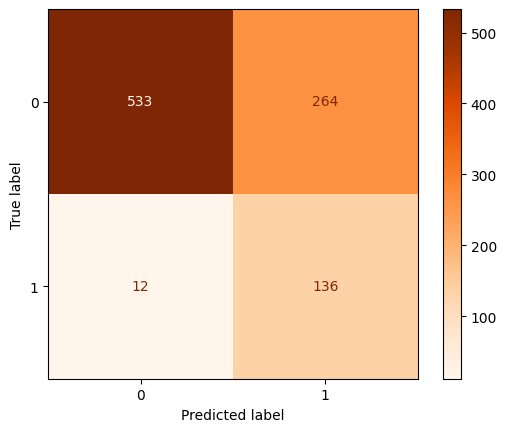

In [23]:
# Naive Bayes Classifier:

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_sm, y_train_sm)

# Predict on real test data
nb_preds = nb_model.predict(X_test)

# Evaluate

print(classification_report(y_test, nb_preds))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_preds)
ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_model.classes_).plot(cmap='Oranges')

### Naive Bayes Insights:

- Good Accuracy: 82%; low precision (0.46) but good recall (0.91) for churn, i.e. catches churn but with many false positives.
- F1-score for churn: 0.61 and low precision (0.46).
- Confusion matrix shows many false positives → often predicts churn when customers actually stayed.

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       797
           1       0.84      0.93      0.88       148

    accuracy                           0.96       945
   macro avg       0.91      0.95      0.93       945
weighted avg       0.96      0.96      0.96       945



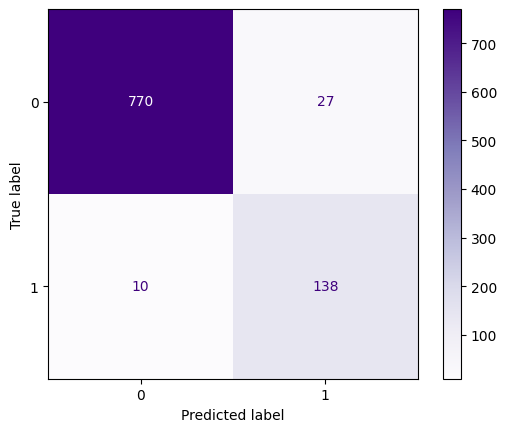

In [24]:
# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
print(classification_report(y_test, xgb_preds))

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_preds)
ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_model.classes_).plot(cmap='Purples')

### XGBoost Insights 

- High Accuracy: 96%; good precision (0.84) and even better recall (0.92) for churn → balanced and strong.
- F1-score for churn: 0.88 -> very good overall performance detecting churn.
- Confusion matrix shows few errors, accurately identifying churn with minimal mistakes.

### Final Model Comparison Summary 

- Logistic Regression: 83% accuracy; strong recall, weak precision → moderate F1-score.
- Random Forest: 96% accuracy; balanced precision (0.91) and recall (0.88) → strong performance.
- Naive Bayes: 82% accuracy; high recall but low precision → many false positives.
- XGBoost: 96% accuracy; slightly lower precision (0.84), higher recall (0.92) → excellent at detecting churn.

**Random Forest and XGBoost offered the most balanced and reliable performance for this project's churn prediction.**

# 💡Conclusion & Recommendations

This project explored churn prediction using data from an Iranian telecom company. The analysis showed that customers who churned were generally more dissatisfied and less engaged, with higher complaints and lower service usage.

To predict churn, four models were tested. While Naive Bayes and Logistic Regression struggled with precision and produced more false positives (i.e., predicting churn when the customer actually stayed), **Random Forest and XGBoost stood out - both achieving 96% accuracy and strong F1-scores, making them the most reliable options for churn detection.**

These models can support more targeted retention strategies. One approach is to offer re-engagement perks—such as gift cards through partners like Amazon or Target—to customers flagged as low-engagement, encouraging them to return to or increase their usage. In addition, personalizing retention efforts with empathetic outreach can help ensure at-risk customers feel heard and supported.

An important limitation to note: Lower usage might not always mean dissatisfaction. For example, someone might be using their phone less because they’re abroad, taking a break from work, or just using Wi-Fi more - nothing to do with the service itself. Retention efforts should feel human, not pushy - and that’s exactly why they need to be flexible and customer-centered.
Rather than assuming a customer is unhappy, churn predictions can be used as a starting point to open a conversation- offering support, options, or simply checking in.